In [1]:
import visual_behavior.database as db
import visual_behavior.utilities as vbu
from visual_behavior.data_access import loading
from visual_behavior.translator.foraging2 import data_to_change_detection_core
import seaborn as sns
from scipy import signal
from scipy.signal import medfilt
import visual_behavior.encoder_processing.utilities as encoder_utilities
from visual_behavior.encoder_processing.spline_regression import spline_regression

import allensdk.brain_observatory.behavior.running_processing as rp

/home/dougo/Code/AllenSDK/allensdk/brain_observatory/behavior/behavior_ophys_api/behavior_ophys_nwb_api.py:9: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
%widescreen
%matplotlib notebook

In [4]:
bsid = 938991494
running_df = encoder_utilities.load_running_df(bsid)
running_df = encoder_utilities.add_speed_acceleration_jerk(running_df, column_label='raw',v_max='v_sig_max')

In [9]:
cached_res_dir = '/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/smoothed_running_data'
cached_df_1500_1600 = pd.read_csv(os.path.join(cached_res_dir, 'running_data_behavior_session_id={}_1500_to_1600.csv'.format(bsid)))
cached_df_1000_2000 = pd.read_csv(os.path.join(cached_res_dir, 'running_data_behavior_session_id={}_1000_2000_1.csv'.format(bsid)))
cached_df_full = pd.read_csv(os.path.join(cached_res_dir, 'running_data_behavior_session_id={}_full.csv'.format(bsid)))

<IPython.core.display.Javascript object>


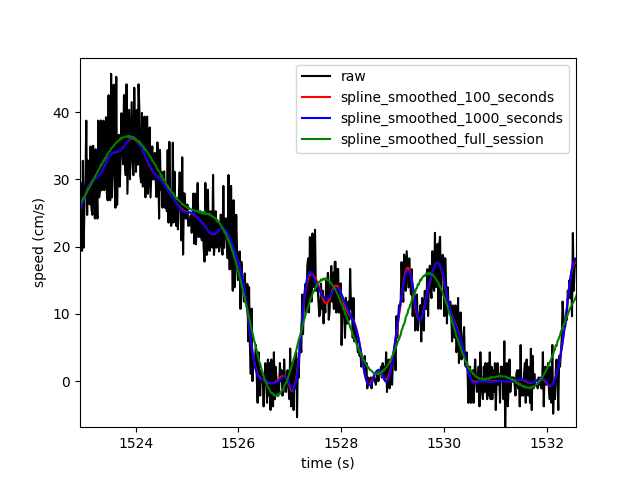

(1500.0, 1600.0)

In [11]:
fig,ax=plt.subplots()
ax.plot(running_df['time'], running_df['speed_raw'],color='black')
ax.plot(cached_df_1500_1600['time'], cached_df_1500_1600['speed_spline_smoothed_F=12'],color='red')
ax.plot(cached_df_1000_2000['time'], cached_df_1000_2000['speed_spline_smoothed_F=12'],color='blue')
ax.plot(cached_df_full['time'], cached_df_full['speed_spline_smoothed_F=12'],color='green')
ax.set_xlabel('time (s)')
ax.set_ylabel('speed (cm/s)')
ax.legend(['raw','spline_smoothed_100_seconds','spline_smoothed_1000_seconds', 'spline_smoothed_full_session'])
ax.set_xlim(1500,1600)